In [ ]:
# ================= STARTUP CELL =================
# Runs every time notebook starts
# No training here

!pip install -q transformers tensorflow streamlit pillow opendatasets

import tensorflow as tf
import numpy as np
import streamlit as st
from tensorflow.keras.models import load_model
from transformers import (
    AutoTokenizer,
    TFBertForSequenceClassification,
    AutoImageProcessor,
    TFViTForImageClassification
)

# --- Load Image Model ---
image_model = load_model("mobilenetv2_plant_disease.h5")

# --- Load ViT Model ---
vit_model = TFViTForImageClassification.from_pretrained(
    "vit_plant_disease_model"
)
image_processor = AutoImageProcessor.from_pretrained(
    "vit_plant_disease_model"
)

# --- Load BERT Model ---
bert_model = TFBertForSequenceClassification.from_pretrained(
    "bert_text_model"
)
tokenizer = AutoTokenizer.from_pretrained("bert_text_model")

print(" Startup complete — all models loaded")
# =================================================

In [ ]:
# ======================================
# STARTUP CELL (NO GOOGLE DRIVE)
# ======================================

# 1️ Install required libraries
!pip install -q \
    opendatasets \
    streamlit \
    transformers \
    tensorflow \
    pillow \
    numpy \
    pandas \
    datasets

print(" Libraries installed")

# 2️ Download dataset from Kaggle
import opendatasets as od
import os

DATASET_URL = "https://www.kaggle.com/datasets/emmarex/plantdisease"
DATASET_DIR = "plantdisease"

# Download only if not already present
if not os.path.exists(DATASET_DIR):
    print(" Downloading Plant Disease dataset from Kaggle...")
    od.download(DATASET_URL)
else:
    print(" Dataset already exists")

print(" Dataset ready at:", DATASET_DIR)

# 3️ Verify important folders
plant_village_path = os.path.join(DATASET_DIR, "PlantVillage")

if os.path.exists(plant_village_path):
    print(" PlantVillage folder found")
    print("Classes:", len(os.listdir(plant_village_path)))
else:
    print(" PlantVillage folder NOT found")

print("\n Startup cell completed successfully")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 40.4 MB/s eta 0:00:00
 Libraries installed
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dhananjaysaxena51
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/emmarex/plantdisease


100%|██████████| 658M/658M [00:03<00:00, 173MB/s] 

 Dataset ready at: plantdisease
 PlantVillage folder found
Classes: 15

 Startup cell completed successfully


In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/emmarex/plantdisease", force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dhananjaysaxena51
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/emmarex/plantdisease


100%|██████████| 658M/658M [00:05<00:00, 115MB/s]


In [ ]:
import pandas as pd
data = pd.read_csv('/content/plantdisease/plant_disease_text_dataset.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Remove duplicates
data = data.drop_duplicates()

# Drop missing rows
data = data.dropna()

In [ ]:
import pandas as pd

data = pd.read_csv('/content/plantdisease/plant_disease_text_dataset.csv')

# Show basic info
print("Shape:", data.shape)
print("\nColumns in dataset:\n", data.columns.tolist())#gives a list of all column names in the dataset
print("\nFirst few rows:\n")
print(data.head())#shows the first 5 rows of the datasets

Shape: (117, 4)

Columns in dataset:
 ['Plant', 'Disease', 'Symptoms', 'Treatment']

First few rows:

    Plant       Disease                                           Symptoms  \
0  Tomato   Late Blight  Water-soaked brown spots on leaves and fruit, ...   
1  Tomato  Early Blight  Dark brown concentric spots on lower leaves, y...   
2  Tomato     Leaf Curl  Upward curling leaves, yellowing and stunted g...   
3  Potato   Late Blight  Dark lesions on leaves and stems, white fungal...   
4  Potato   Black Scurf  Black sclerotia on tuber surface, poor sprouting.   

                                           Treatment  
0  Remove infected leaves, avoid overhead irrigat...  
1  Remove affected leaves, rotate crops, use Manc...  
2  Control whiteflies, use resistant varieties, r...  
3  Apply fungicides like Metalaxyl, ensure good d...  
4  Treat tubers before planting, rotate with non-...  


In [ ]:
import re #for regular expressions (cleaning text, removing symbols, patterns)
import nltk #Natural Language Toolkit (main NLP library)
from nltk.corpus import stopwords #to remove common words like is, the, and
from nltk.stem import PorterStemmer #to reduce words to their root form (e.g., playing → play)

# Download stopwords once
nltk.download('stopwords')

# Initialize stemmer and stopwords
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer() #Creates a stemmer to convert words to their root form (e.g., running → run)

# ---------- Step 1: Identify the text column ----------
print("Available columns:", data.columns.tolist())

# Try common names or detect first object column
possible_names = ['text', 'description', 'sentence', 'comment', 'notes', 'disease', 'symptom']
text_col = None

for name in possible_names:
    if name in data.columns:
        text_col = name
        break

if text_col is None:
    text_col = data.select_dtypes(include=['object']).columns[0]
    print(f"No common text column found. Using: '{text_col}'")
else:
    print(f"Using detected text column: '{text_col}'")

# ---------- Step 2: Clean text ----------
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

data['clean_text'] = data[text_col].apply(clean_text)

# ---------- Step 3: Remove stopwords + apply stemming ----------
def preprocess_text(text):
    words = [stemmer.stem(word) for word in text.split() if word not in stop_words]
    return ' '.join(words)

data['processed_text'] = data['clean_text'].apply(preprocess_text)

# ---------- Step 4: Check the result ----------
print("\nSample after preprocessing:")
print(data[['clean_text', 'processed_text']].head())



Available columns: ['Plant', 'Disease', 'Symptoms', 'Treatment']
No common text column found. Using: 'Plant'

Sample after preprocessing:
  clean_text processed_text
0     tomato         tomato
1     tomato         tomato
2     tomato         tomato
3     potato         potato
4     potato         potato


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import tensorflow as tf #used to build, train, and run machine learning / deep learning models.

dataset_path = "/content/plantdisease/PlantVillage"

# Load dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    image_size=(224, 224),
    batch_size=32,
    label_mode='int',
    shuffle=True
)

# Save class names BEFORE mapping
class_names = dataset.class_names

# Normalize pixel values
dataset = dataset.map(lambda x, y: (x / 255.0, y))

print(" Dataset loaded successfully!")
print("Classes:", class_names)

Found 20638 files belonging to 15 classes.
 Dataset loaded successfully!
Classes: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


In [ ]:
train_size = 0.8
val_size = 0.1
test_size = 0.1

total_batches = tf.data.experimental.cardinality(dataset).numpy()

train_ds = dataset.take(int(total_batches * train_size))
val_ds = dataset.skip(int(total_batches * train_size)).take(int(total_batches * val_size))
test_ds = dataset.skip(int(total_batches * (train_size + val_size)))

print(f"Train batches: {tf.data.experimental.cardinality(train_ds).numpy()}")
print(f"Validation batches: {tf.data.experimental.cardinality(val_ds).numpy()}")
print(f"Test batches: {tf.data.experimental.cardinality(test_ds).numpy()}")

Train batches: 516
Validation batches: 64
Test batches: 65


In [ ]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1),
])

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,895 (42.61 MB)

 Trainable params: 11,170,895 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.applications import MobileNetV2 #a pretrained CNN model for image classification
from tensorflow.keras.preprocessing import image #utilities to load and process images
from tensorflow.keras.applications.mobilenet_v2 #prepares images in the right format for MobileNetV2
import preprocess_input, decode_predictions #converts model output into human-readable labels
import numpy as np #for array and numerical operations

In [ ]:
model = MobileNetV2(weights='imagenet')

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
import tensorflow as tf

# Load training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "plantdisease/PlantVillage",   # path to your dataset folder
    image_size=(224, 224),
    batch_size=32
)

# Optional: Split dataset
val_ds = train_ds.take(20)
train_ds = train_ds.skip(20)

# Normalize images
train_ds = train_ds.map(lambda x, y: (x/255.0, y))
val_ds = val_ds.map(lambda x, y: (x/255.0, y))

Found 20638 files belonging to 15 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Step 1: Load dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "plantdisease/PlantVillage",
    image_size=(224, 224),
    batch_size=32
)

# Save class names before mapping
class_names = train_ds.class_names
num_classes = len(class_names)
print("Number of classes:", num_classes)
print("Classes:", class_names)

# Step 2: Normalize images
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))

# Step 3: Import pre-trained MobileNetV2 (feature extractor)
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,       # Remove final classification layers
    weights='imagenet'       # Use pre-trained weights
)
base_model.trainable = False  # Freeze base model

# Step 4: Build your model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

# Step 5: Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 6: Train
model.fit(train_ds, epochs=15)

# Step 7 (Optional): Save model
model.save("mobilenetv2_plant_disease.h5")

Found 20638 files belonging to 15 classes.
Number of classes: 15
Classes: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/15
645/645 ━━━━━━━━━━━━━━━━━━━━ 1032s 2s/step - accuracy: 0.6812 - loss: 1.0043
Epoch 2/15
645/645 ━━━━━━━━━━━━━━━━━━━━ 964s 1s/step - accuracy: 0.8784 - loss: 0.3663
Epoch 3/15
645/645 ━━━━━━━━━━━━━━━━━━━━ 927s 1s/step - accuracy: 0.9023 - loss: 0.2904
Epoch 4/15
645/645 ━━━━━━━━━━━━━━━━━━━━ 945s 1s/step - accuracy: 0.9194 - loss: 0.2377
Epoch 5/15
645/645 ━━━━━━━━━━━━━━━━━━━━ 915s 1s/step - accuracy: 0.9278 - loss: 0.2158
Epoch 6/15
645/645 ━━━━━━━━━━━━━━

Found 20638 files belonging to 15 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted class probabilities for the first image: [7.12603111e-18 1.29014004e-11 3.34913122e-16 4.37172068e-14
 4.87654063e-07 4.38420914e-12 1.13216936e-11 3.69058083e-11
 6.35899389e-11 4.52253117e-13 3.81610299e-10 1.86355642e-09
 2.40812261e-17 9.37512980e-13 9.99999464e-01]
Predicted class for the first image: Tomato_healthy
True label for the first image: Tomato_healthy


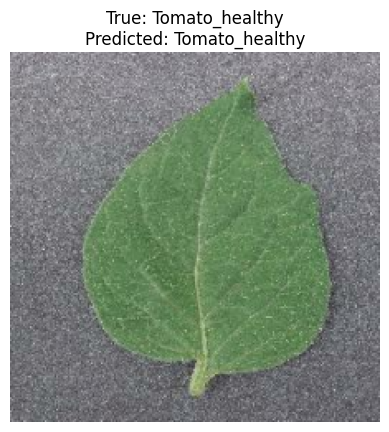

In [ ]:
from tensorflow.keras.models import load_model #loads a saved trained model
import numpy as np #handles arrays & numerical data
import matplotlib.pyplot as plt #displays images/plots
import tensorflow as tf  #runs the ML/deep learning model

# Load the saved model
model = load_model('mobilenetv2_plant_disease.h5')

# Get a sample image from the test dataset
# Note: test_ds was defined in an earlier cell, but it was skipped due to KeyboardInterrupt in the last cell.
# I'll create a new test_ds for this example.

# Re-loading dataset to get test_ds
dataset_path = "/content/plantdisease/PlantVillage"
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    image_size=(224, 224),
    batch_size=32,
    label_mode='int',
    shuffle=True
)

train_size = 0.8
val_size = 0.1
total_batches = tf.data.experimental.cardinality(dataset).numpy()

test_ds = dataset.skip(int(total_batches * (train_size + val_size)))

# Normalize the test dataset
test_ds = test_ds.map(lambda x, y: (x / 255.0, y))

# Take one batch from the test set
for images, labels in test_ds.take(1):
    sample_images = images.numpy()
    sample_labels = labels.numpy()
    break

# Make predictions
preds = model.predict(sample_images)

# Display predictions for the first image in the batch
print(f"Predicted class probabilities for the first image: {preds[0]}")
predicted_class_index = np.argmax(preds[0])
predicted_class_name = class_names[predicted_class_index]
print(f"Predicted class for the first image: {predicted_class_name}")
print(f"True label for the first image: {class_names[sample_labels[0]]}")

# Optional: Display the first sample image
plt.imshow(sample_images[0])
plt.title(f"True: {class_names[sample_labels[0]]}\nPredicted: {predicted_class_name}")
plt.axis('off')
plt.show()

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification

#This tokenizer:
#Converts sentences to tokens
#Converts tokens to IDs
#Adds special tokens: [CLS] -----> Used to represent the overall meaning (for classification tasks).
#[SEP]----->added at the end (or between sentences) Used to separate sentences.
#Pads / truncates sequences
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

#Loads the pretrained BERT-base model
#---Adds a classification head on top
#---num_labels = num_classes
#Meaning:
#If you have 5 classes → output layer has 5 neurons
#If you have 38 plant disease classes → BERT outputs 38 probabilities
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_classes)

#Prints how many classification labels your BERT model is set for
print(f"BERT model initialized with {num_classes} labels.")

In [ ]:
from sklearn.model_selection import train_test_split

# For disease classification, we use the 'Disease' column as both the text features and to derive the labels.

texts = data['Disease'].tolist() #converts the Disease column into a list of text samples
labels = data['Disease'].astype('category').cat.codes.tolist()#converts disease names into numeric class labels

# Split data into training and validation sets
# Increased test_size to ensure it's greater than or equal to the number of classes for stratification
train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts, labels, test_size=0.3, random_state=42, stratify=labels
    #splits data into training (70%) and validation (30%)
)

print(f"Number of training samples: {len(train_texts)}")
print(f"Number of validation samples: {len(val_texts)}")
print("Sample training text:", train_texts[0])
print("Sample validation text:", val_labels[0])

Number of training samples: 81
Number of validation samples: 36
Sample training text: Yellow Vein Mosaic
Sample validation text: 12


In [ ]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=128)

print("Training encodings created.")
print("Validation encodings created.")

In [ ]:
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
))

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    val_labels
))

print("TensorFlow datasets created for training and validation.")

TensorFlow datasets created for training and validation.


In [ ]:
tf.keras.optimizers.Adam


keras.src.optimizers.adam.Adam

In [ ]:
import tensorflow as tf
from transformers import TFBertForSequenceClassification


In [ ]:
import tensorflow as tf

# Recalculate num_classes based on the unique diseases in the text dataset
# This ensures the BERT model's final layer matches the number of text labels
num_classes_bert = len(data['Disease'].astype('category').cat.categories)
print(f"Number of classes for BERT model (based on unique diseases): {num_classes_bert}")

Number of classes for BERT model (based on unique diseases): 29


In [ ]:
# Convert encodings and labels into tf.data.Dataset objects
# The BERT model expects input in a dictionary format for its forward pass
train_dataset = tf.data.Dataset.from_tensor_slices(
    ({
        'input_ids': train_encodings['input_ids'],
        'attention_mask': train_encodings['attention_mask']
    },
    tf.constant(train_labels))
).shuffle(100).batch(16).prefetch(tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices(
    ({
        'input_ids': val_encodings['input_ids'],
        'attention_mask': val_encodings['attention_mask']
    },
    tf.constant(val_labels))
).batch(16).prefetch(tf.data.AUTOTUNE)

print("train_dataset and val_dataset created for BERT training.")

train_dataset and val_dataset created for BERT training.


In [ ]:
import os #handle files and directories
import shutil #copy / move / delete files
import tensorflow as tf #train and run models
from transformers import TFBertForSequenceClassification, AutoTokenizer, AutoConfig
from safetensors import safe_open #safely load model weights (.safetensors)

# Define the path to the Hugging Face cache directory
hf_cache_home = os.path.expanduser("~/.cache/huggingface")

# Aggressively clear the Hugging Face cache
if os.path.exists(hf_cache_home):
    print(f"Clearing Hugging Face cache at: {hf_cache_home}")
    shutil.rmtree(hf_cache_home)
    print("Hugging Face cache cleared.")
else:
    print("Hugging Face cache directory not found, nothing to clear.")

print("\nAttempting to load TFBertForSequenceClassification model...")

# Explicitly load config and tokenizer
config = AutoConfig.from_pretrained('bert-base-uncased')
# Set num_labels directly on the config object
config.num_labels = num_classes_bert
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

# Now, load the TFBertForSequenceClassification model with the modified config
# Explicitly set use_safetensors=False to avoid the TypeError with safe_open
model = TFBertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    config=config,
    use_safetensors=False # Force loading from .bin files, avoiding the problematic safe_open
)

# Pass the optimizer as a string identifier
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
print("Model loaded and compiled successfully!")

Clearing Hugging Face cache at: /root/.cache/huggingface
Hugging Face cache cleared.

Attempting to load TFBertForSequenceClassification model...


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/536M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model loaded and compiled successfully!


In [ ]:
# Re-import necessary components to ensure TFBertForSequenceClassification is used
import tensorflow as tf
from transformers import TFBertForSequenceClassification, AutoConfig, AutoTokenizer

# Ensure num_classes_bert and config are correctly defined
# (Assuming num_classes_bert is available from previous cells. If not, it needs to be re-derived)
# Example re-derivation if needed: num_classes_bert = len(data['Disease'].astype('category').cat.categories)

# Re-load config and set num_labels
config = AutoConfig.from_pretrained('bert-base-uncased')
config.num_labels = num_classes_bert

# Re-initialize the TFBertForSequenceClassification model
# This step ensures the `model` variable holds the correct TensorFlow model
model = TFBertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    config=config,
    use_safetensors=False # To avoid previous issues with safe_open
)

# Re-compile the model
model.compile(
    optimizer='adam', # Using string identifier for robustness
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history = model.fit(
    train_dataset, # Use the prepared tf.data.Dataset
    epochs=10, # You can adjust the number of epochs
    validation_data=val_dataset # Use the prepared tf.data.Dataset
)

print("BERT model training complete.")

In [ ]:
history = model.fit(
    train_dataset, # The dataset is already shuffled and batched
    epochs=3, # You can adjust the number of epochs
    validation_data=val_dataset # The dataset is already batched
)

print("BERT model training complete.")

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the saved image classification model
image_model = load_model('mobilenetv2_plant_disease.h5')

# The class_names list was already defined from a previous cell.
# For clarity and to ensure its availability here:
# You might need to re-run the cell where class_names was defined if running this cell in isolation.
# class_names = ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']

def predict_image_disease(image_path):
    """
    Predicts the plant disease from an image using the loaded MobileNetV2 model.

    Args:
        image_path (str): The path to the image file.

    Returns:
        str: The predicted class name of the disease.
    """
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create a batch
    img_array = img_array / 255.0  # Normalize pixel values

    predictions = image_model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    predicted_class_name = class_names[predicted_class_index]

    return predicted_class_name

print("Image classification model 'mobilenetv2_plant_disease.h5' loaded.")
print("Function 'predict_image_disease' defined.")

In [ ]:
text_disease_names = data['Disease'].unique().tolist()
text_num_classes = len(text_disease_names)

print(f"Unique disease names for text classification: {text_disease_names}")
print(f"Number of unique disease classes for text classification: {text_num_classes}")

In [ ]:
from sklearn.model_selection import train_test_split

# For disease classification, we use the 'Disease' column as both the text features and to derive the labels.
# Note: 'clean_text' was derived from the 'Plant' column, which might not be suitable for disease classification.
texts = data['Disease'].tolist()
labels = data['Disease'].astype('category').cat.codes.tolist()

# Split data into training and validation sets
# Increased test_size to ensure it's greater than or equal to the number of classes for stratification
train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts, labels, test_size=0.3, random_state=42, stratify=labels
)

print(f"Number of training samples: {len(train_texts)}")
print(f"Number of validation samples: {len(val_texts)}")
print("Sample training text:", train_texts[0])
print("Sample validation text:", val_labels[0])

Number of training samples: 81
Number of validation samples: 36
Sample training text: Yellow Vein Mosaic
Sample validation text: 12


In [ ]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=128)

print("Training encodings created.")
print("Validation encodings created.")

In [ ]:
# Convert encodings and labels into tf.data.Dataset objects
# The BERT model expects input in a dictionary format for its forward pass
train_dataset = tf.data.Dataset.from_tensor_slices(
    ({
        'input_ids': train_encodings['input_ids'],
        'attention_mask': train_encodings['attention_mask']
    },
    tf.constant(train_labels))
).shuffle(100).batch(16).prefetch(tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices(
    ({
        'input_ids': val_encodings['input_ids'],
        'attention_mask': val_encodings['attention_mask']
    },
    tf.constant(val_labels))
).batch(16).prefetch(tf.data.AUTOTUNE)

print("train_dataset and val_dataset created for BERT training.")

In [ ]:
model.save_pretrained('bert_text_model')
tokenizer.save_pretrained('bert_text_model')

print("Fine-tuned BERT model and tokenizer saved to 'bert_text_model' directory.")

In [ ]:
import os

# Verify bert_text_model directory
bert_path = "bert_text_model"
if os.path.exists(bert_path):
    print(f"Directory '{bert_path}' exists.")
    print(f"Contents of '{bert_path}': {os.listdir(bert_path)}")
else:
    print(f"Directory '{bert_path}' DOES NOT exist.")

# Verify vit_plant_disease_model directory
vit_path = "vit_plant_disease_model"
if os.path.exists(vit_path):
    print(f"Directory '{vit_path}' exists.")
    print(f"Contents of '{vit_path}': {os.listdir(vit_path)}")
else:
    print(f"Directory '{vit_path}' DOES NOT exist.")
print("Verified model directories.")

In [ ]:
import tensorflow as tf
from datasets import load_dataset
from transformers import (
    AutoImageProcessor,
    TFViTForImageClassification,
    DefaultDataCollator,
    AutoConfig
)


In [ ]:
dataset = load_dataset(
    "imagefolder",
    data_dir="plantdisease/PlantVillage"
)


In [ ]:
processor = AutoImageProcessor.from_pretrained(
    "google/vit-base-patch16-224"
)


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


In [ ]:
def preprocess(example):
    # Process each image in the batch
    processed_pixel_values = []
    for img in example["image"]:
        if img.mode != "RGB":
            img = img.convert("RGB")
        # processor returns a dictionary with 'pixel_values' as a tensor (1, C, H, W)
        # We want the (C, H, W) tensor, so we take [0]
        processed_pixel_values.append(processor(images=img, return_tensors="tf")["pixel_values"][0])

    # Stack the list of processed tensors into a single batch tensor
    example["pixel_values"] = tf.stack(processed_pixel_values)

    # Convert the list of labels to a TensorFlow tensor
    example["label"] = tf.constant(example["label"], dtype=tf.int32)

    return example

dataset = dataset.with_transform(preprocess)

In [ ]:
data_collator = DefaultDataCollator(return_tensors="tf")

labels = dataset["train"].features["label"].names
num_labels = len(labels)

print("Number of labels:", num_labels)
print("Classes:", labels)

full_tf_dataset = dataset["train"].to_tf_dataset(
    columns=["pixel_values"],
    label_cols=["label"],
    shuffle=True,
    batch_size=8,          # SAFE batch size
    collate_fn=data_collator
)

total_batches = tf.data.experimental.cardinality(full_tf_dataset).numpy()

train_batches = int(0.8 * total_batches)
val_batches = int(0.1 * total_batches)

tf_train_dataset = (
    full_tf_dataset
    .take(train_batches)
    .shuffle(100)
    .prefetch(tf.data.AUTOTUNE)
)

tf_val_dataset = (
    full_tf_dataset
    .skip(train_batches)
    .take(val_batches)
    .prefetch(tf.data.AUTOTUNE)
)

print("Train batches:", train_batches)
print("Validation batches:", val_batches)


In [ ]:
config = AutoConfig.from_pretrained(
    "google/vit-base-patch16-224"
)
config.num_labels = num_labels

model = TFViTForImageClassification.from_pretrained(
    "google/vit-base-patch16-224",
    config=config,
    ignore_mismatched_sizes=True,
    use_safetensors=False
)


tf_model.h5:   0%|          | 0.00/347M [00:00<?, ?B/s]

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

print(" ViT model compiled successfully")



In [ ]:
history = model.fit(
    tf_train_dataset,
    validation_data=tf_val_dataset,
    epochs=1
)

print(" ViT training complete")

In [ ]:
model.save_pretrained("vit_plant_disease_model")
processor.save_pretrained("vit_plant_disease_model")

print(" Model saved successfully")

In [ ]:
# Save models
image_model.save("mobilenetv2_plant_disease.h5")
vit_model.save_pretrained("vit_plant_disease_model")
processor.save_pretrained("vit_plant_disease_model")
bert_model.save_pretrained("bert_text_model")
tokenizer.save_pretrained("bert_text_model")

print("Models saved successfully")



chatbot----------------------------------------------------------

In [ ]:
!pip install streamlit pyngrok
!streamlit run app.py & npx localtunnel --port 8501


In [ ]:
import streamlit as st
import numpy as np
import tensorflow as tf
from PIL import Image
from tensorflow.keras.models import load_model
from transformers import AutoTokenizer, TFBertForSequenceClassification
from tensorflow.keras.preprocessing import image

# -------------------------------
# Page config
# -------------------------------
st.set_page_config(
    page_title="Plant Disease AI Chatbot",
    page_icon="🌱",
    layout="wide"
)

st.title("🌱 Plant Disease Detection Chatbot")
st.write("Upload images and/or text to detect plant disease and get cure.")

# -------------------------------
# Load MODELS (cached)
# -------------------------------
@st.cache_resource
def load_models():
    image_model = load_model("mobilenetv2_plant_disease.h5")
    tokenizer = AutoTokenizer.from_pretrained("bert_text_model")
    text_model = TFBertForSequenceClassification.from_pretrained("bert_text_model")
    return image_model, tokenizer, text_model

image_model, tokenizer, text_model = load_models()

# -------------------------------
# Class names
# -------------------------------
CLASS_NAMES = [
    'Pepper__bell___Bacterial_spot',
    'Pepper__bell___healthy',
    'Potato___Early_blight',
    'Potato___Late_blight',
    'Potato___healthy',
    'Tomato_Bacterial_spot',
    'Tomato_Early_blight',
    'Tomato_Late_blight',
    'Tomato_Leaf_Mold',
    'Tomato_Septoria_leaf_spot',
    'Tomato_Spider_mites_Two_spotted_spider_mite',
    'Tomato__Target_Spot',
    'Tomato__Tomato_YellowLeaf__Curl_Virus',
    'Tomato__Tomato_mosaic_virus',
    'Tomato_healthy'
]

# -------------------------------
# Disease explanation mapping
# -------------------------------
DISEASE_EXPLANATION = {
    "Pepper__bell___Bacterial_spot": "Bacterial infection causing leaf spots. Remove infected plants and apply copper spray.",
    "Pepper__bell___healthy": "Healthy plant. No treatment needed.",
    "Potato___Early_blight": "Fungal disease. Remove infected leaves and use fungicide.",
    "Potato___Late_blight": "Severe disease. Use certified fungicide immediately.",
    "Potato___healthy": "Healthy potato plant.",
    "Tomato_Bacterial_spot": "Bacterial infection. Avoid overhead watering.",
    "Tomato_Early_blight": "Fungal disease. Use crop rotation.",
    "Tomato_Late_blight": "Serious disease. Remove infected plants urgently.",
    "Tomato_Leaf_Mold": "Fungal disease in humid conditions.",
    "Tomato_Septoria_leaf_spot": "Fungal leaf disease. Remove infected leaves.",
    "Tomato_Spider_mites_Two_spotted_spider_mite": "Pest infection. Use neem oil.",
    "Tomato__Target_Spot": "Fungal infection. Use fungicide spray.",
    "Tomato__Tomato_YellowLeaf__Curl_Virus": "Viral disease spread by whiteflies.",
    "Tomato__Tomato_mosaic_virus": "Viral infection. Remove infected plants.",
    "Tomato_healthy": "Healthy tomato plant."
}

# -------------------------------
# Image prediction function
# -------------------------------
def predict_image(img):
    img = img.resize((224, 224))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    preds = image_model.predict(img_array)
    idx = np.argmax(preds)
    confidence = float(preds[0][idx])

    return CLASS_NAMES[idx], confidence

# -------------------------------
# Text prediction function
# -------------------------------
def predict_text(text):
    inputs = tokenizer(text, return_tensors="tf", truncation=True, padding=True)
    outputs = text_model(**inputs)
    logits = outputs.logits
    idx = tf.argmax(logits, axis=1).numpy()[0]

    confidence = tf.nn.softmax(logits)[0][idx].numpy()
    return CLASS_NAMES[idx], float(confidence)

# -------------------------------
# UI Layout
# -------------------------------
uploaded_images = st.file_uploader(
    "Upload plant images",
    type=["jpg", "png", "jpeg"],
    accept_multiple_files=True
)

user_text = st.text_area("Describe symptoms (optional)")

# -------------------------------
# Predictions
# -------------------------------
if st.button("🔍 Analyze"):
    st.subheader("Results")

    # Image predictions
    if uploaded_images:
        for img_file in uploaded_images:
            img = Image.open(img_file).convert("RGB")
            st.image(img, width=250)

            d, c = predict_image(img)
            st.success(f" Disease: {d}")
            st.info(f" Confidence: {c*100:.2f}%")
            st.write(f" Explanation: {DISEASE_EXPLANATION.get(d, 'No information available')}")

    # Text prediction
    if user_text.strip():
        d, c = predict_text(user_text)
        st.success(f" Text Prediction Disease: {d}")
        st.info(f" Confidence: {c*100:.2f}%")
        st.write(f" Explanation: {DISEASE_EXPLANATION.get(d, 'No information available')}")
